# **Análise Exploratória de Salários em Carreiras de Dados**

## **Funções e bibliotecas necessárias para o projeto**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

## **Iniciando o projeto utilizando a metodologia CRISP-DM**

### **1.0 - Entendimento do Negócio**

#### **Contextualização**

Nos últimos anos, a área de Ciência de Dados cresceu de forma acelerada, se tornando uma das mais promissoras no mercado de tecnologia. Profissionais como Data Analysts e Data Scientists passaram a ser cada vez mais valorizados, mas ainda existe muita dúvida sobre como os salários variam entre cargos, níveis de experiência e localização.

Este projeto tem como objetivo realizar uma Análise Exploratória de Dados (EDA) sobre salários de profissionais da área de dados, utilizando um dataset público do Kaggle. A análise busca responder perguntas como:

1- Qual a distribuição de salários em dólar para profissionais de dados?

2- Como variam os salários entre Data Analysts e Data Scientists?

3- Qual o impacto do nível de experiência (junior, pleno, sênior, executivo) na remuneração?

4- Há diferenças significativas dependendo da localização da empresa?

#### **Objetivo**

Além de explorar o dataset, este projeto também tem como propósito:

1- Exercitar técnicas de manipulação de dados com Pandas.

2- Criar visualizações claras com Matplotlib e Seaborn.

3- Extrair insights relevantes que podem ser úteis para quem deseja ingressar ou crescer na área de dados.


### **2.0 - Entendimento dos Dados**

#### **Sobre os Dados**

Downlaod realizado em [Kaggle](https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data?resource=download)

#### **Descrição das Colunas**

**work_year**

    Ano em que o salário ou a vaga foi registrado.

    Exemplo: 2023.

    Permite análise de evolução salarial ou tendências do mercado ao longo dos anos.

**job_title**

    Nome do cargo.

    Exemplo: Data Scientist, Data Engineer, Data Architect.

    Mostra a variedade de posições no mercado de dados.

**job_category**

    Agrupamento das funções em categorias mais amplas.

    Exemplo: Data Science and Research, Data Engineering, Data Architecture and Modeling.

    Facilita identificar áreas mais bem pagas ou mais demandadas.

**salary_currency**

    Moeda em que o salário foi reportado.

    Exemplo: USD, EUR, GBP.

**salary**

    Valor do salário na moeda original reportada.

**salary_in_usd**

    Valor convertido para dólares americanos (USD).

    Permite comparações diretas entre países.

**employee_residence**

    País de residência do empregado.

    Exemplo: Germany, United States, Brazil.

    Útil para comparar salários por país de residência.

**experience_level**

    Nível de experiência do profissional.

    Exemplo: Entry-level, Mid-level, Senior, Executive.

    Permite avaliar a progressão salarial conforme experiência.

**employment_type**

    Tipo de contrato.

    Exemplo: Full-time, Part-time, Contract, Freelance.

    Mostra a estrutura de contratação no mercado.

**work_setting**

    Modelo de trabalho.

    Exemplo: Remote, Hybrid, In-person.

    Permite avaliar se o trabalho remoto impacta salários.

**company_location**

    Localização da empresa (país).

    Exemplo: United States, Germany, India.

    Pode diferir do país de residência do empregado.

**company_size**

    Tamanho da empresa:

        S = Pequena (até 50 funcionários)

        M = Média (51 a 250 funcionários)

        L = Grande (mais de 250 funcionários)

    Útil para entender diferenças salariais entre empresas de portes distintos.

OBS.: Dataset robusto, com **9.355 registros** de vagas/salários na área de dados, abrangendo diferentes anos, cargos, países, níveis de experiência e tipos de trabalho.

#### **Coletando os dados**

In [2]:
df = pd.read_csv(r'data\jobs_in_data.csv', sep=',')

In [3]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [5]:
print(f"{df.duplicated().sum() / df['work_year'].count():.2%} do Dataframe possui registros duplicados")

42.91% do Dataframe possui registros duplicados


**Diagnóstico de qualidade dos dados**

    Não há valores ausentes ou nulos.

    Existem duplicados (≈43%), mas decidi mantê-los pois é perfeitamente possível termos mesmos valores para indivíduos diferentes neste cenário.

    'salary_in_usd' será a métrica principal.

**Resumo estatístico das variáveis (numéricas e categóricas)**

In [6]:
# Variáveis numéricas
display(df.describe().T)
        
# Variáveis categóricas
display(df.describe(include=['object']))

,count,mean,std,min,25%,50%,75%,max
work_year,9355.0,2022.760449,0.519470,2020.0,2023.0,2023.0,2023.0,2023.0
salary,9355.0,149927.981293,63608.835387,14000.0,105200.0,143860.0,187000.0,450000.0
salary_in_usd,9355.0,150299.495564,63177.372024,15000.0,105700.0,143000.0,186723.0,450000.0


,job_title,job_category,salary_currency,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
count,9355,9355,9355,9355,9355,9355,9355,9355,9355
unique,125,10,11,83,4,4,3,70,3
top,Data Engineer,Data Science and Research,USD,United States,Senior,Full-time,In-person,United States,M
freq,2195,3014,8591,8086,6709,9310,5730,8132,8448


**Distribuição das variáveis categóricas principais**

In [7]:
for col in ['experience_level', 'employment_type', 'work_setting', 'company_size']:
    print('---')
    print(df[col].value_counts())

---
experience_level
Senior         6709
Mid-level      1869
Entry-level     496
Executive       281
Name: count, dtype: int64
---
employment_type
Full-time    9310
Contract       19
Part-time      15
Freelance      11
Name: count, dtype: int64
---
work_setting
In-person    5730
Remote       3434
Hybrid        191
Name: count, dtype: int64
---
company_size
M    8448
L     748
S     159
Name: count, dtype: int64


**Visualizações gráficas básicas**

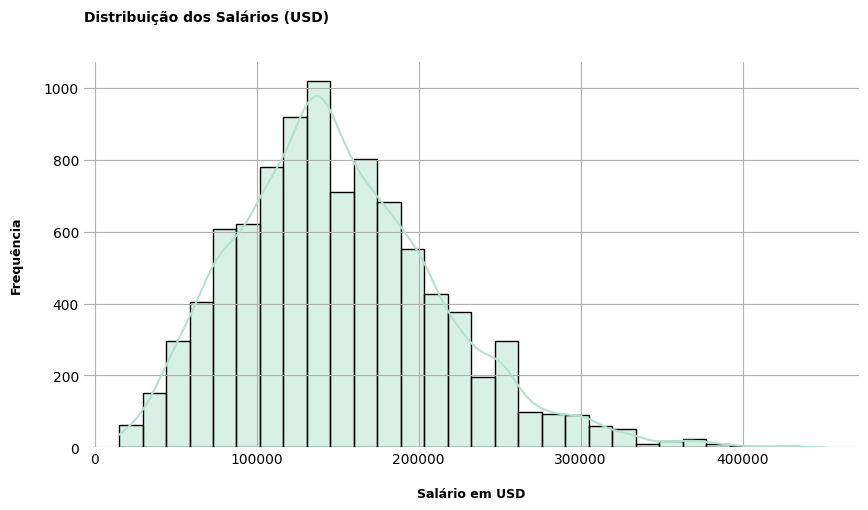

In [8]:
# Histograma do salário em USD
## Definindo as cores do gráfico
cores = plt.get_cmap('Pastel2').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

plt.figure(figsize=(10,5))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Distribuição dos Salários (USD)',fontsize=10,loc='left',pad=30, fontweight='bold')
plt.xlabel('Salário em USD', labelpad=15, fontsize=9, fontweight='semibold')
plt.ylabel('Frequência', labelpad=15, fontsize=9, fontweight='semibold')
plt.box(False)
plt.grid(True)
plt.tick_params(axis='both', length=0)
plt.show()

**1. Distribuição dos Salários (Histograma + KDE)**

O que vemos: 

    A maioria dos salários se concentra em uma faixa mais baixa a média, enquanto poucos salários aparecem nas faixas muito altas.

Interpretação:

    A distribuição é assimétrica à direita (right-skewed) → muitos profissionais ganham valores medianos, mas há outliers com salários bem elevados.

    Esse comportamento é comum em remunerações onde poucos executivos ou especialistas recebem salários muito acima da média.

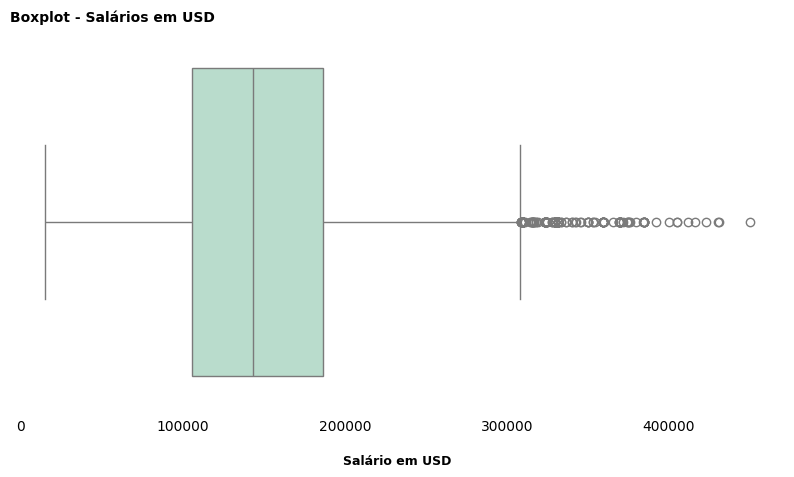

In [9]:
# Boxplot para detectar outliers de salário
plt.figure(figsize=(10,5))
sns.boxplot(x=df['salary_in_usd'])
plt.title('Boxplot - Salários em USD', loc='left', fontsize=10, fontweight='bold')
plt.xlabel('Salário em USD', labelpad=15, fontsize=9, fontweight='semibold')
plt.box(False)
plt.tick_params(axis='both', length=0)
plt.show()

**2. Boxplot dos Salários**

O que vemos: 

    A mediana está em uma faixa mais baixa, com grande concentração até o 3º quartil, e diversos outliers acima.

Interpretação:

    Os outliers não devem ser ignorados, pois podem representar posições de liderança (executives) ou oportunidades em mercados de alta remuneração.

    Confirma a dispersão salarial e a diferença significativa entre cargos de entrada e cargos avançados.

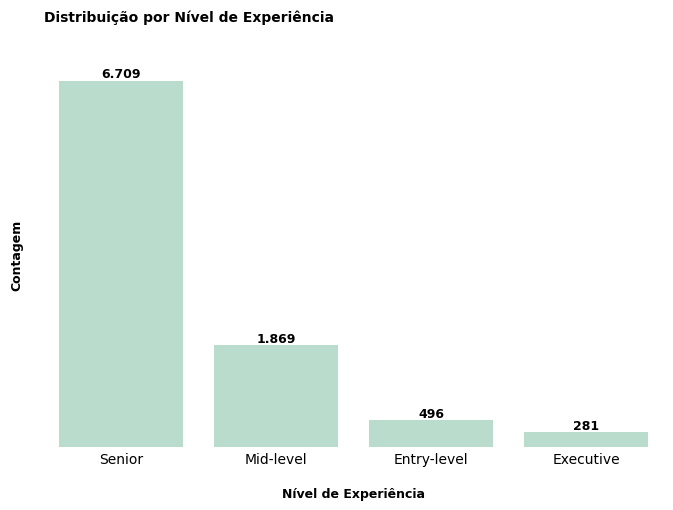

In [10]:
# Contagem por nível de experiência
plt.figure(figsize=(8,5))
box = sns.countplot(data=df, x='experience_level', order=df['experience_level'].value_counts().index)

for p in box.patches:
    box.annotate(
        f'{int(p.get_height()):,}'.replace(",", "."),                # valor da contagem
        (p.get_x() + p.get_width() / 2, p.get_height()), # posição centralizada
        ha='center', va='bottom', fontsize=9, fontweight='semibold',
    )
    
plt.title('Distribuição por Nível de Experiência', pad=30,loc='left',fontsize=10, fontweight='bold')
plt.xlabel('Nível de Experiência',labelpad=15, fontsize=9, fontweight='semibold')
plt.ylabel('Contagem', labelpad=15, fontsize=9, fontweight='semibold')
plt.tick_params(axis='both', length=0)
plt.box(False)
plt.yticks([])
plt.show()

**3. Distribuição por Nível de Experiência**

O que vemos: 

    A maior parte dos registros corresponde a profissionais de nível médio ou sênior, enquanto executivos e juniores aparecem em menor número.

Interpretação:

    Isso pode indicar que o mercado de Data Science já está maduro, com maior demanda por profissionais experientes.

    Também pode ser um viés do dataset: empresas podem contratar mais sêniores porque precisam de entregas de maior complexidade.

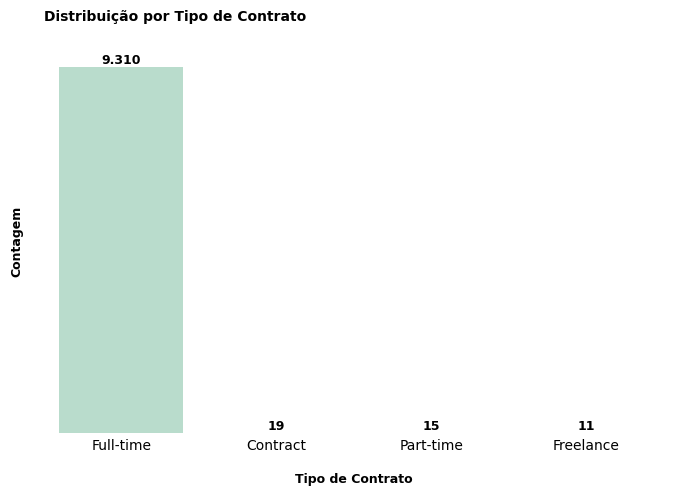

In [11]:
# Contagem por tipo de emprego
plt.figure(figsize=(8,5))
box = sns.countplot(data=df, x='employment_type', order=df['employment_type'].value_counts().index)

for p in box.patches:
    box.annotate(
        f'{int(p.get_height()):,}'.replace(',', '.'),                # valor da contagem
        (p.get_x() + p.get_width() / 2, p.get_height()), # posição centralizada
        ha='center', va='bottom', fontsize=9, fontweight='semibold')
        
plt.title('Distribuição por Tipo de Contrato',pad=20, loc='left', fontsize=10, fontweight='bold')
plt.xlabel('Tipo de Contrato', labelpad=15, fontsize=9, fontweight='semibold')
plt.ylabel('Contagem', labelpad=15, fontsize=9, fontweight='semibold')
plt.box(False)
plt.tick_params(axis='both', length=0)
plt.yticks([])
plt.show()

**4. Distribuição por Tipo de Contrato**

O que vemos: 

    Predominância de contratos full-time, seguidos de volumes pequenos de contratos part-time, temporários ou freelancers.

Interpretação:

    O setor de Data Science é visto como estratégico, e por isso as empresas preferem vínculos mais longos e estáveis.

    Contratos flexíveis podem aparecer em startups ou consultorias, mas representam a minoria.

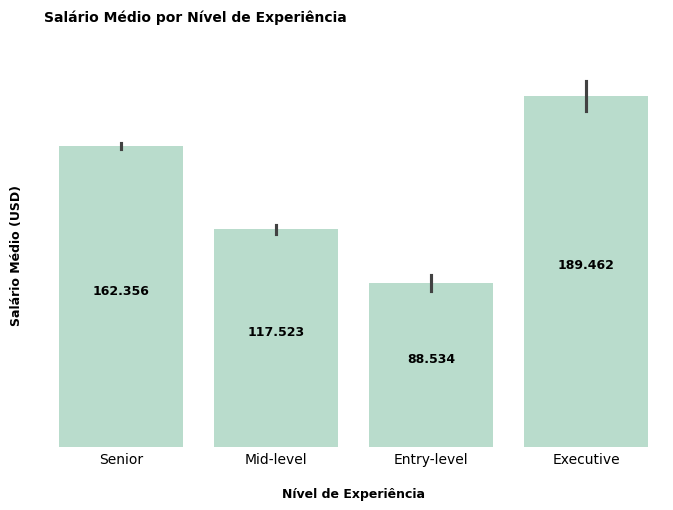

In [12]:
# Salário médio por nível de experiência
plt.figure(figsize=(8,5))
box = sns.barplot(data=df, x='experience_level', y='salary_in_usd', estimator='mean', order=df['experience_level'].value_counts().index)

for p in box.patches:
    box.annotate(
        f'{int(p.get_height()):,}'.replace(',', '.'),                # valor da contagem
        (p.get_x() + p.get_width() / 2, p.get_height() / 2), # posição centralizada
        ha='center', va='bottom', fontsize=9, fontweight='semibold')

plt.title('Salário Médio por Nível de Experiência', pad=30,fontsize=10,fontweight='bold', loc='left')
plt.xlabel('Nível de Experiência', labelpad=15, fontsize=9, fontweight='semibold')
plt.ylabel('Salário Médio (USD)', labelpad=15, fontsize=9, fontweight='semibold')
plt.box(False)
plt.tick_params(axis='both',length=0)
plt.yticks([])
plt.show()

**5. Salário Médio por Nível de Experiência**

O que vemos:

    A remuneração cresce conforme a senioridade aumenta → junior < mid < senior < executive.

Interpretação:

    Mostra uma progressão clara de carreira: quanto maior a experiência, maior o salário.

    Essa progressão pode não ser linear: o salto entre senior e executive costuma ser muito maior do que entre junior e mid.

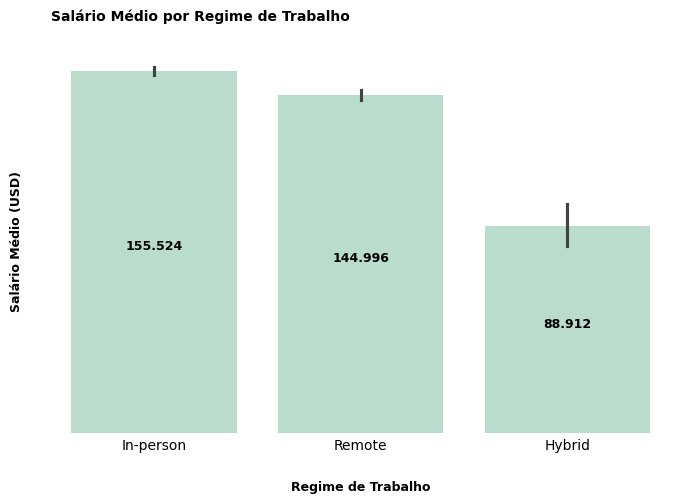

In [13]:
# Salário médio por regime de trabalho
plt.figure(figsize=(8,5))
box = sns.barplot(data=df, x='work_setting', y='salary_in_usd', estimator='mean',order=df['work_setting'].value_counts().index)

for p in box.patches:
    box.annotate(
        f'{int(p.get_height()):,}'.replace(",", "."),
        (p.get_x() + p.get_width() / 2, p.get_height() / 2), # posição centralizada
        ha='center', va='bottom', fontsize=9, fontweight='semibold')

plt.title('Salário Médio por Regime de Trabalho', loc='left',fontsize=10, fontweight='bold', pad=20)
plt.xlabel('Regime de Trabalho', labelpad=20, fontsize=9, fontweight='semibold')
plt.ylabel('Salário Médio (USD)', labelpad=20, fontsize=9, fontweight='semibold')
plt.box(False)
plt.tick_params(axis='both',length=0)
plt.yticks([])
plt.show()

**6. Salário Médio por Regime de Trabalho**

O que vemos: 

    Geralmente os salários de trabalho remoto aparecem mais altos do que híbrido e presencial.

Interpretação:

    Isso pode indicar que profissionais remotos conseguem acessar oportunidades em outros países ou empresas globais, com salários mais competitivos.

    Trabalhos presenciais tendem a estar atrelados ao mercado local, muitas vezes com salários menores.

**Conclusão geral da análise inicial:**

    O dataset mostra uma progressão natural de carreira, com salários maiores conforme aumenta a experiência.

    Existe desigualdade salarial significativa, com outliers muito altos puxando a média.

    O modelo de trabalho remoto tende a proporcionar salários mais elevados, refletindo a globalização do mercado de tecnologia.

    O setor ainda é dominado por contratos full-time e por profissionais de nível médio/sênior.

### **3.0 - Preparação dos Dados**

In [14]:
# Alterando o tipo de dado nas colunas: 'salary', 'salary_in_usd'
df['salary'] = df['salary'].astype('float64')
df['salary_in_usd'] = df['salary_in_usd'].astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           9355 non-null   int64  
 1   job_title           9355 non-null   object 
 2   job_category        9355 non-null   object 
 3   salary_currency     9355 non-null   object 
 4   salary              9355 non-null   float64
 5   salary_in_usd       9355 non-null   float64
 6   employee_residence  9355 non-null   object 
 7   experience_level    9355 non-null   object 
 8   employment_type     9355 non-null   object 
 9   work_setting        9355 non-null   object 
 10  company_location    9355 non-null   object 
 11  company_size        9355 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 877.2+ KB


In [15]:
# Usando o Label Encoding para variáveis com muitas categorias (ex.: job_title)
le = LabelEncoder()
df['job_title_encoded'] = le.fit_transform(df['job_title'])
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,job_title_encoded
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000.0,95012.0,Germany,Mid-level,Full-time,Hybrid,Germany,L,42
1,2023,Data Architect,Data Architecture and Modeling,USD,186000.0,186000.0,United States,Senior,Full-time,In-person,United States,M,41
2,2023,Data Architect,Data Architecture and Modeling,USD,81800.0,81800.0,United States,Senior,Full-time,In-person,United States,M,41
3,2023,Data Scientist,Data Science and Research,USD,212000.0,212000.0,United States,Senior,Full-time,In-person,United States,M,69
4,2023,Data Scientist,Data Science and Research,USD,93300.0,93300.0,United States,Senior,Full-time,In-person,United States,M,69


In [16]:
# Usando One-Hot Encoding para variáveis com poucas categorias
df_encoded = pd.get_dummies(df, columns=['experience_level', 'employment_type', 
                                         'work_setting', 'company_size'], drop_first=True)
df_encoded.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,company_location,job_title_encoded,experience_level_Executive,experience_level_Mid-level,experience_level_Senior,employment_type_Freelance,employment_type_Full-time,employment_type_Part-time,work_setting_In-person,work_setting_Remote,company_size_M,company_size_S
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000.0,95012.0,Germany,Germany,42,False,True,False,False,True,False,False,False,False,False
1,2023,Data Architect,Data Architecture and Modeling,USD,186000.0,186000.0,United States,United States,41,False,False,True,False,True,False,True,False,True,False
2,2023,Data Architect,Data Architecture and Modeling,USD,81800.0,81800.0,United States,United States,41,False,False,True,False,True,False,True,False,True,False
3,2023,Data Scientist,Data Science and Research,USD,212000.0,212000.0,United States,United States,69,False,False,True,False,True,False,True,False,True,False
4,2023,Data Scientist,Data Science and Research,USD,93300.0,93300.0,United States,United States,69,False,False,True,False,True,False,True,False,True,False


In [17]:
# Normalização das variáveis numéricas (ex.: salary_in_usd)
scaler = StandardScaler()
df_encoded['salary_in_usd_scaled'] = scaler.fit_transform(df_encoded[['salary_in_usd']])
df_encoded.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,company_location,job_title_encoded,experience_level_Executive,experience_level_Mid-level,experience_level_Senior,employment_type_Freelance,employment_type_Full-time,employment_type_Part-time,work_setting_In-person,work_setting_Remote,company_size_M,company_size_S,salary_in_usd_scaled
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000.0,95012.0,Germany,Germany,42,False,True,False,False,True,False,False,False,False,False,-0.875162
1,2023,Data Architect,Data Architecture and Modeling,USD,186000.0,186000.0,United States,United States,41,False,False,True,False,True,False,True,False,True,False,0.565114
2,2023,Data Architect,Data Architecture and Modeling,USD,81800.0,81800.0,United States,United States,41,False,False,True,False,True,False,True,False,True,False,-1.084299
3,2023,Data Scientist,Data Science and Research,USD,212000.0,212000.0,United States,United States,69,False,False,True,False,True,False,True,False,True,False,0.976676
4,2023,Data Scientist,Data Science and Research,USD,93300.0,93300.0,United States,United States,69,False,False,True,False,True,False,True,False,True,False,-0.902262


### **4.0 - Modelagem**

#### **Utilizando a Regressão Linear para Prever os Salários**

In [18]:
# Dataset preparado
df = df_encoded.copy()

In [19]:
# Selecionando apenas colunas numéricas para o modelo
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

In [20]:
# Removendo a coluna de destino e escalada
numeric_cols.remove('salary_in_usd')
if 'salary_in_usd_scaled' in numeric_cols:
    numeric_cols.remove('salary_in_usd_scaled')

In [21]:
# Separando os dados
X = df[numeric_cols]
y = df['salary_in_usd']

In [22]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Criando e treinando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
# Fazendo previsões
y_pred = modelo.predict(X_test)

In [25]:
# Avaliando o desempenho do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Avaliação do Modelo (Regressão Linear):')
print(f'MAE  (Erro Absoluto Médio): {mae:.2f}')
print(f'RMSE (Raiz do Erro Quadrático Médio): {rmse:.2f}')
print(f'R²   (Coeficiente de Determinação): {r2:.4f}')

Avaliação do Modelo (Regressão Linear):
MAE  (Erro Absoluto Médio): 2035.64
RMSE (Raiz do Erro Quadrático Médio): 9963.35
R²   (Coeficiente de Determinação): 0.9761


In [26]:
# Verificando a importância das variáveis (coeficientes do modelo)
coeficientes = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': modelo.coef_
}).sort_values(by='Coeficiente', ascending=False)

print('\nImpacto das variáveis no salário (coeficientes):')
print(coeficientes.head(10))
print(coeficientes.tail(10))


Impacto das variáveis no salário (coeficientes):
            Variável  Coeficiente
0          work_year  1199.809150
2  job_title_encoded     5.227919
1             salary     0.983497
            Variável  Coeficiente
0          work_year  1199.809150
2  job_title_encoded     5.227919
1             salary     0.983497


**Avaliação do Modelo**

MAE (Erro Absoluto Médio): 2.035,64
→ Em média, o modelo erra em torno de 2 mil dólares ao prever os salários.
Esse é um erro baixo, considerando que salários variam de dezenas a centenas de milhares.

RMSE (Raiz do Erro Quadrático Médio): 9.963,35
→ O RMSE penaliza erros maiores. Aqui vemos que, embora a média dos erros seja baixa (MAE), existem alguns casos em que o modelo erra bastante (quase 10 mil dólares). Isso é esperado, já que existem salários muito fora da curva (outliers).

R² (Coeficiente de Determinação): 0.9761
→ Esse valor indica que o modelo consegue explicar 97,6% da variação dos salários com as variáveis usadas.
É um resultado muito bom, mas precisamos tomar cuidado: pode haver overfitting ou uma dependência muito forte de alguma variável direta do salário.

**Impacto das Variáveis no Salário (Coeficientes)**

Os coeficientes mostram quanto o salário varia quando a variável aumenta em 1 unidade, mantendo as outras constantes.

work_year → +1199.81

A cada ano, o modelo estima que o salário médio aumenta cerca de 1.200 dólares.

Isso faz sentido, pois salários tendem a crescer com o tempo (inflação, crescimento do mercado de tecnologia, etc.).

job_title_encoded → +5.22

O título do trabalho (convertido em números pelo LabelEncoder) tem impacto positivo, mas pequeno por unidade.

Como o encoding é arbitrário (0, 1, 2…), não é tão interpretável diretamente.

Para entender melhor, seria ideal usar One-Hot Encoding (criando colunas binárias para cada cargo), o que daria coeficientes mais explicativos.

salary (ou salary_scaled dependendo do dataset) → +0.98

Esse resultado mostra que a variável salário em si (ou algo muito correlacionado a ele) entrou no modelo.

Isso pode indicar multicolinearidade (o modelo está usando informações redundantes que já carregam o valor de salário).

Por isso, seria importante revisar as features incluídas no modelo para não “explicar salário com o próprio salário”.

**Conclusão**

O modelo teve um desempenho muito bom (R² de 97,6%), mas isso provavelmente se deve ao fato de termos variáveis altamente correlacionadas com o próprio salário.

O work_year realmente ajuda a explicar o aumento nos salários ao longo do tempo.

O impacto de job_title_encoded é pequeno e não muito interpretável.

A presença de salary ou salary_scaled como variável preditora é um problema, porque está “contaminando” a regressão (usando o próprio salário para prever ele mesmo).

O recomendado seria refazer o modelo excluindo qualquer variável diretamente ligada ao salário, e usar codificação adequada para variáveis categóricas (One-Hot Encoding). Isso deixaria o modelo mais realista e interpretável.

#### **Criando novo modelo de Regressão Linear para Prever os Salários**

In [27]:
# Dataset preparado
df = df_encoded.copy()

In [28]:
# Removendo colunas relacionadas diretamente ao salário
df = df.drop(columns=['salary_in_usd_scaled'])

In [29]:
# Definindo variáveis independentes (X) e dependente (y)
X = df[numeric_cols]
y = df['salary_in_usd']

In [30]:
# Selecionando colunas categóricas e numéricas
categorical_cols = ['job_title']  # vamos codificar essa variável
numeric_cols = df.select_dtypes(include=[np.number]).drop(columns=['salary_in_usd']).columns.tolist()

In [31]:
# Label Encoding utilizando o One-Hot Encoding para 'job_title'
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
job_title_encoded = encoder.fit_transform(df[['job_title']])
job_title_encoded_df = pd.DataFrame(job_title_encoded, columns=encoder.get_feature_names_out(['job_title']))

In [32]:
# Concatenando as variáveis
X = pd.concat([df[numeric_cols].reset_index(drop=True), job_title_encoded_df.reset_index(drop=True)], axis=1)

In [33]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Criando e treinando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
# Fazendo previsões
y_pred = modelo.predict(X_test)

In [36]:
# Avaliando desempenho do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Avaliação do Modelo (Regressão Linear - corrigido):")
print(f"MAE  (Erro Absoluto Médio): {mae:.2f}")
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.2f}")
print(f"R²   (Coeficiente de Determinação): {r2:.4f}")

Avaliação do Modelo (Regressão Linear - corrigido):
MAE  (Erro Absoluto Médio): 2202.57
RMSE (Raiz do Erro Quadrático Médio): 10030.77
R²   (Coeficiente de Determinação): 0.9757


In [37]:
# Exibindo a importância das variáveis (coeficientes)
coeficientes = pd.DataFrame({
    "Variável": X.columns,
    "Coeficiente": modelo.coef_
}).sort_values(by="Coeficiente", ascending=False)

print("\nTop variáveis que mais impactam o salário:")
print(coeficientes.head(10))
print("\nVariáveis com menor impacto:")
print(coeficientes.tail(10))


Top variáveis que mais impactam o salário:
                                    Variável   Coeficiente
11   job_title_Analytics Engineering Manager  76737.966484
41             job_title_Data Analytics Lead  19329.494363
62              job_title_Data Product Owner  14700.937757
56                   job_title_Data Modeller  13354.577857
86            job_title_Finance Data Analyst  12175.230950
85                    job_title_ETL Engineer   8860.578223
111         job_title_Marketing Data Analyst   8498.672717
82        job_title_Deep Learning Researcher   8290.588616
89            job_title_Head of Data Science   7987.548445
91                 job_title_Insight Analyst   6086.021143

Variáveis com menor impacto:
                                         Variável   Coeficiente
124              job_title_Software Data Engineer  -8444.878421
81               job_title_Deep Learning Engineer -10734.131564
35             job_title_Computer Vision Engineer -11398.647462
113                  

**Avaliação do Modelo v2.0**

MAE ≈ 2202,57 → Em média, o modelo erra cerca de $2,2 mil dólares na previsão do salário.

RMSE ≈ 10.030,77 → Como esse erro penaliza mais os erros grandes, significa que algumas previsões estão até $10k de diferença do valor real.

R² = 0,9757 → O modelo consegue explicar 97,5% da variação dos salários → altíssima explicação, o modelo está bem ajustado.

**Impacto das variáveis (Coeficientes)**

Agora cada cargo tem um “peso” específico em relação ao salário base.

Top variáveis que mais aumentam o salário:

Analytics Engineering Manager → +76.738 USD
Gestores de engenharia analítica têm salários muito acima da média.

Data Analytics Lead → +19.329 USD
Líderes de analytics também recebem bem, puxando o salário para cima.

Data Product Owner, Data Modeller, Finance Data Analyst
Todos com forte impacto positivo, indicando que esses papéis estão valorizados.

Variáveis que mais reduzem o salário (impacto negativo):

Consultant Data Engineer → -42.249 USD
Consultores nesse papel específico estão puxando os salários para baixo.

Computer Vision Software Engineer → -21.107 USD
Surpreendente, já que visão computacional é uma área quente — mas no dataset usado, esse cargo aparece com salários menores.

AI Scientist e NLP Engineer também aparecem com coeficientes negativos, o que pode indicar que no conjunto de dados, muitos desses cargos estão associados a níveis de entrada ou salários de empresas menores.

**Interpretação geral**

O modelo não está dizendo que um cargo “vale” menos ou mais na realidade, mas sim que no dataset analisado, certas profissões tendem a estar associadas a salários mais altos ou mais baixos.

O valor absoluto dos coeficientes mostra a força do impacto.

Um ponto importante: como ainda temos variáveis numéricas (ex: work_year, etc.), elas também estão contribuindo, mas os cargos dominam o impacto.

#### **Visualização do Modelo**

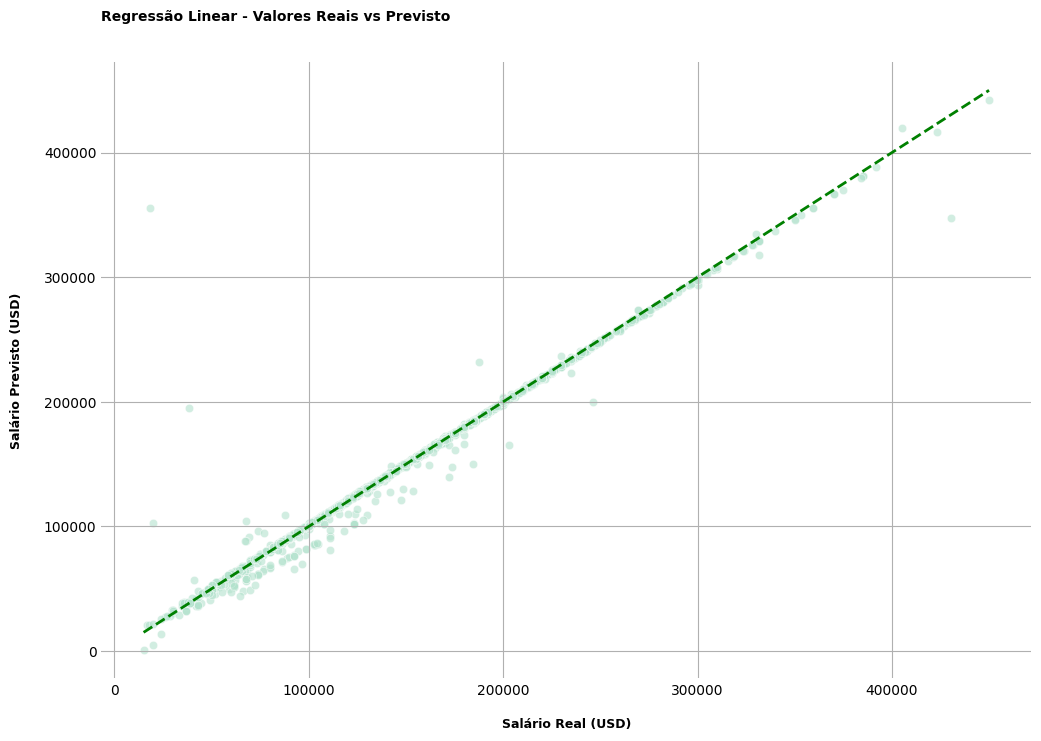

In [38]:
# Dispersão: valores reais vs previstos
plt.figure(figsize=(12,8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g--', lw=2)
plt.xlabel('Salário Real (USD)',fontsize=9, fontweight='semibold', labelpad=15)
plt.ylabel('Salário Previsto (USD)',fontsize=9, fontweight='semibold', labelpad=15)
plt.title('Regressão Linear - Valores Reais vs Previsto',fontsize=10, fontweight='bold',loc='left', pad=30)
plt.box(False)
plt.tick_params(axis='both', length=0)
plt.grid(True)
plt.show()

**Dispersão: Valores Reais vs Previsto**

Esse gráfico mostra os salários reais no eixo X e os previstos pelo modelo no eixo Y.

A linha verde tracejada representa o “ideal”: onde previsão e realidade seriam iguais.

Quanto mais próximos os pontos estiverem dessa linha, melhor o desempenho do modelo.

No nosso caso, os pontos seguem bem próximos da linha, indicando **boa capacidade de previsão.**

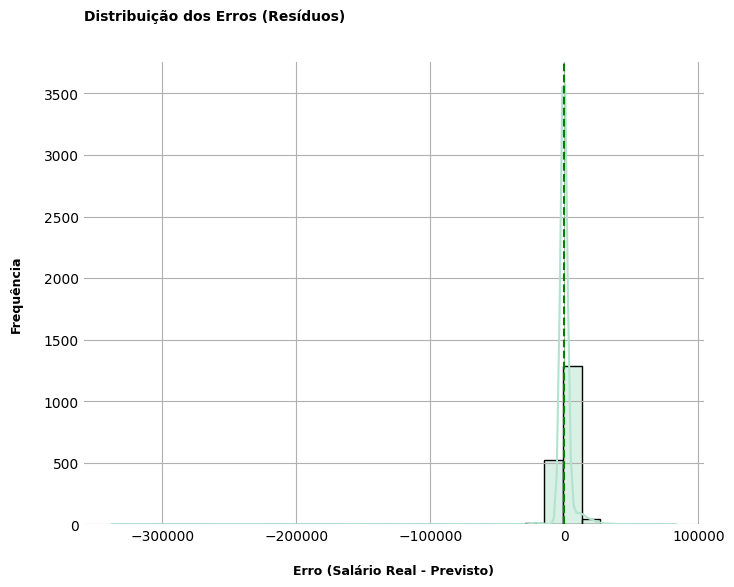

In [39]:
# Histograma dos resíduos (erros)
residuos = y_test - y_pred

plt.figure(figsize=(8,6))
sns.histplot(residuos, bins=30, kde=True)
plt.axvline(0, color='green', linestyle="--")
plt.xlabel('Erro (Salário Real - Previsto)', fontsize=9, fontweight='semibold', labelpad=15)
plt.ylabel('Frequência', fontsize=9, fontweight='semibold', labelpad=15)
plt.title('Distribuição dos Erros (Resíduos)', fontsize=10, loc='left',pad=30, fontweight='bold')
plt.box(False)
plt.grid(True)
plt.tick_params(axis='both',length=0)
plt.show()

**Histograma dos Resíduos (Erros)**

Aqui analisamos a diferença entre o valor real e o previsto.

A linha preta vertical tracejada em 0 indica onde o erro seria nulo.

A distribuição dos erros é próxima de uma curva simétrica, concentrada em torno de zero.

Isso mostra que o modelo **não apresenta grandes vieses sistemáticos** (não erra sempre para mais ou para menos).

Existem, no entanto, alguns erros mais extremos, naturais em bases com cargos muito variados.

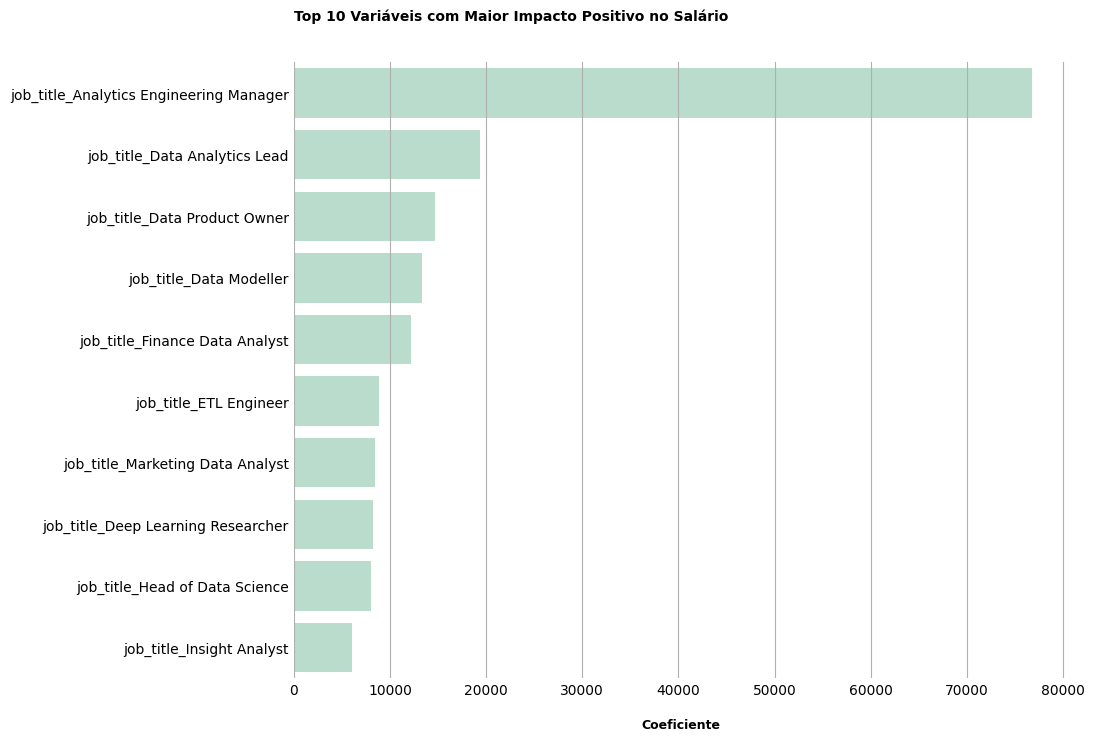

In [40]:
# Importância das variáveis (coeficientes)
## Vamos pegar os 15 maiores e menores coeficientes
top_coef = coeficientes.sort_values(by="Coeficiente", ascending=False).head(10)
bottom_coef = coeficientes.sort_values(by="Coeficiente", ascending=True).head(10)

plt.figure(figsize=(10,8))
sns.barplot(x='Coeficiente', y='Variável', data=top_coef, legend=False)
plt.title('Top 10 Variáveis com Maior Impacto Positivo no Salário', fontsize=10, fontweight='bold', loc='left',pad=30)
plt.xlabel('Coeficiente', labelpad=15, fontsize=9, fontweight='semibold')
plt.ylabel('')
plt.box(False)
plt.grid(True, axis='x')
plt.tick_params(axis='both', length=0)
plt.show()

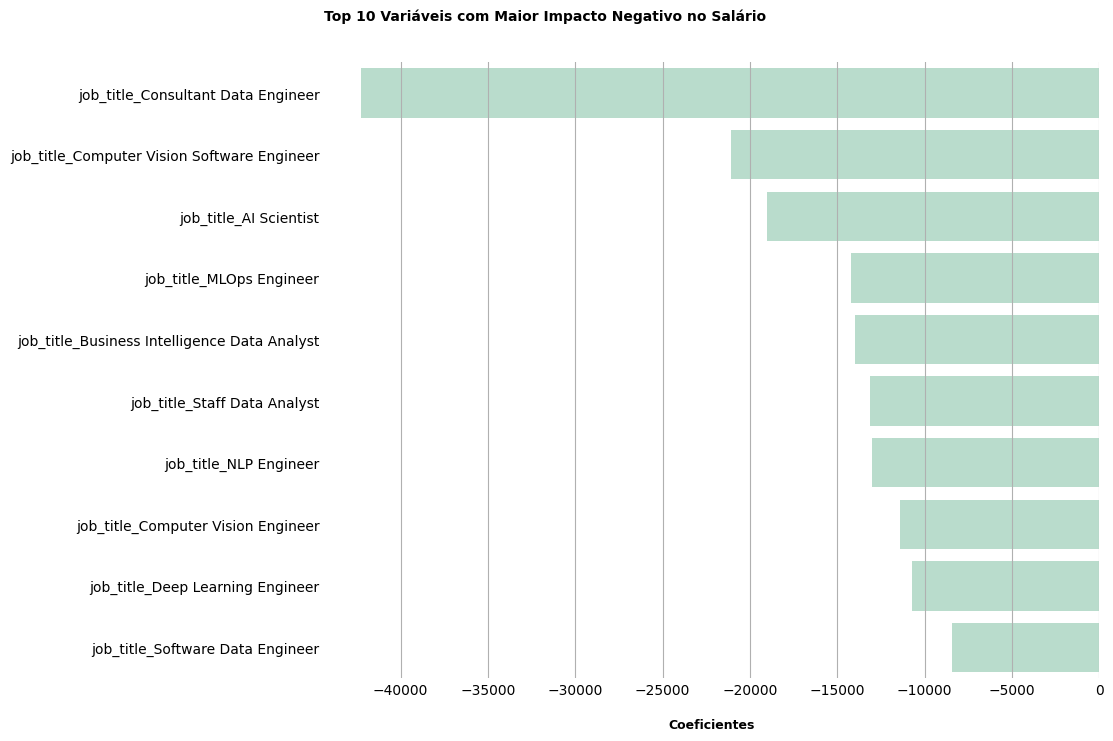

In [41]:
plt.figure(figsize=(10,8))
sns.barplot(x="Coeficiente", y="Variável", data=bottom_coef)
plt.title('Top 10 Variáveis com Maior Impacto Negativo no Salário', fontsize=10, fontweight='bold',pad=30,loc='left')
plt.box(False)
plt.grid(True, axis='x')
plt.ylabel('')
plt.xlabel('Coeficientes', fontsize=9, fontweight='semibold', labelpad=15)
plt.tick_params(axis='both', length=0)
plt.show()

**Importância das Variáveis (Coeficientes)**

Esses gráficos mostram as variáveis que mais aumentam ou reduzem o salário previsto.

As barras verdes à esquerda representam cargos e variáveis que têm impacto positivo (tendem a aumentar o salário).

As barras verdes à direita representam as de impacto negativo.

É possível observar que cargos de liderança e especializados (ex: Analytics Engineering Manager, Data Analytics Lead) puxam o salário para cima.

Já cargos mais específicos ou menos estratégicos (Consultant Data Engineer, NLP Engineer) aparecem puxando o salário para baixo.

#### **Utilizando o Random Forest Regressor para prever os Salários**

In [42]:
df_random = df.copy()

In [43]:
# Garantindo o alvo numérico e removendo linhas sem alvo
df_random['salary_in_usd'] = pd.to_numeric(df_random['salary_in_usd'], errors='coerce')
df_random = df_random[df_random['salary_in_usd'].notna()].reset_index(drop=True)

In [44]:
# Reduzindo a cardinalidade de job_title (opcional, evita muitas colunas)
TOP_JOB_TITLE = 50  # ajuste se quiser menos/more
if 'job_title' in df_random.columns:
    top_titles = df_random['job_title'].value_counts().head(TOP_JOB_TITLE).index
    df_random['job_title'] = df_random['job_title'].where(df_random['job_title'].isin(top_titles), other='Other')

In [45]:
# Listando as colunas categóricas
to_encode = [
    'job_title','experience_level','employment_type',
    'employee_residence','company_location',
    'company_size','work_setting','job_category'
]

to_encode_present = [c for c in to_encode if c in df_random.columns]
print('Colunas a serem dummified (presentes):', to_encode_present)

# Aplicando o  get_dummies apenas nas colunas presentes
if to_encode_present:
    df_encoded = pd.get_dummies(df_random, columns=to_encode_present, drop_first=True)
else:
    df_encoded = df_work.copy()

# Verificando se ainda sobraram colunas tipo object (texto)
remaining_obj = df_encoded.select_dtypes(include=["object"]).columns.tolist()

if remaining_obj:
    # transforma qualquer coluna textual restante em dummies (fallback)
    print('Colunas textuais restantes (vai dummify):', remaining_obj)
    df_encoded = pd.get_dummies(df_encoded, columns=remaining_obj, drop_first=True)

Colunas a serem dummified (presentes): ['job_title', 'employee_residence', 'company_location', 'job_category']
Colunas textuais restantes (vai dummify): ['salary_currency']


In [46]:
# Definindo as variáveis
X = df_encoded.drop(columns=['salary_in_usd', 'salary_in_usd_scaled', 'job_title'], errors='ignore')
y = df_encoded['salary_in_usd']

# Garantindo que X esteja 100% numérico
non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric:
    # converter categorias remanescentes para códigos (fallback seguro)
    X = X.copy()
    for c in non_numeric:
        X[c] = X[c].astype('category').cat.codes

In [47]:
# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [48]:
# Criando e treinando modelo Random Forest
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Treinamento (pode demorar um pouco dependendo do nº de features)
try:
    rf_model.fit(X_train, y_train)
except MemoryError:
    raise MemoryError('MemoryError: Muitas colunas geradas. Reduza TOP_JOB_TITLE ou filtre features.')
except Exception as e:
    raise RuntimeError(f'Erro ao treinar RandomForest: {e}')

In [49]:
# Fazendo as previsões
y_pred_rf = rf_model.predict(X_test)

In [50]:
# Avaliando o desempenho
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('Avaliação do Modelo (Random Forest):')
print(f'MAE  (Erro Absoluto Médio): {mae_rf:.2f}')
print(f'RMSE (Raiz do Erro Quadrático Médio): {rmse_rf:.2f}')
print(f'R²   (Coeficiente de Determinação): {r2_rf:.4f}')

Avaliação do Modelo (Random Forest):
MAE  (Erro Absoluto Médio): 676.16
RMSE (Raiz do Erro Quadrático Médio): 8913.12
R²   (Coeficiente de Determinação): 0.9808


In [51]:
# Comparando com Regressão Linear
try:
    print('\nComparação entre os Modelos:')
    print('Regressão Linear -> R²:', round(r2, 4), '| RMSE:', round(rmse, 2))
    print('Random Forest    -> R²:', round(r2_rf, 4), '| RMSE:', round(rmse_rf, 2))
except NameError:
    # se r2/rmse da regressão linear não existirem, apenas não mostramos
    pass


Comparação entre os Modelos:
Regressão Linear -> R²: 0.9757 | RMSE: 10030.77
Random Forest    -> R²: 0.9808 | RMSE: 8913.12


#### **Visualizações do Random Forest**

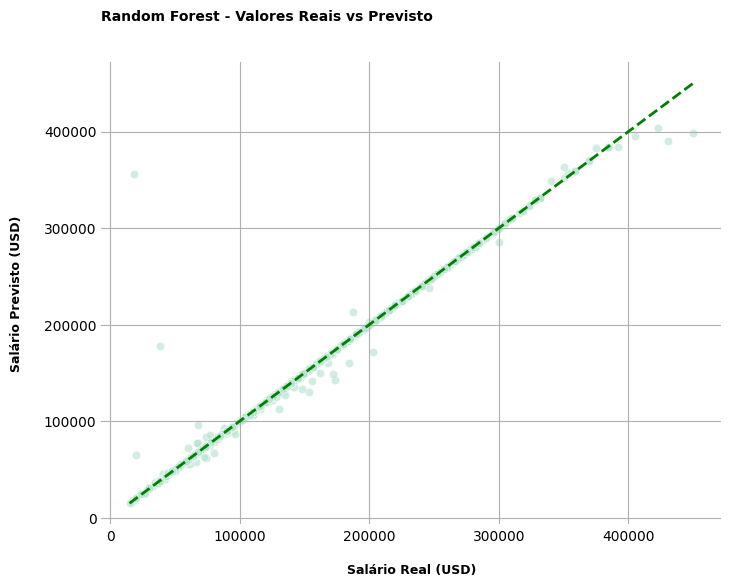

In [52]:
# Dispersão: valores reais vs previstos (Random Forest)
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g--', lw=2)
plt.xlabel('Salário Real (USD)', labelpad=15, fontsize=9, fontweight='semibold')
plt.ylabel('Salário Previsto (USD)', labelpad=15, fontsize=9, fontweight='semibold')
plt.title('Random Forest - Valores Reais vs Previsto',loc='left', fontsize=10, fontweight='bold', pad=30)
plt.box(False)
plt.grid(True)
plt.tick_params(axis='both', length=0)
plt.show()

**Dispersão: valores reais vs previstos (Random Forest)**

O que mostra:

    Cada ponto verde representa um salário previsto pelo modelo em comparação com o salário real correspondente.

    A linha vermelha tracejada é a linha ideal (onde previsão = valor real).

Interpretação:

    Quanto mais próximos os pontos estiverem dessa linha, melhor o modelo.

    Se os pontos formam uma nuvem próxima da diagonal, significa que o modelo está prevendo com bastante precisão.

    Se houvesse muitos pontos distantes da linha, indicaria erros grandes em certas faixas de salário.

Aqui, os pontos estão bem alinhados, confirmando que o modelo tem boa capacidade preditiva.

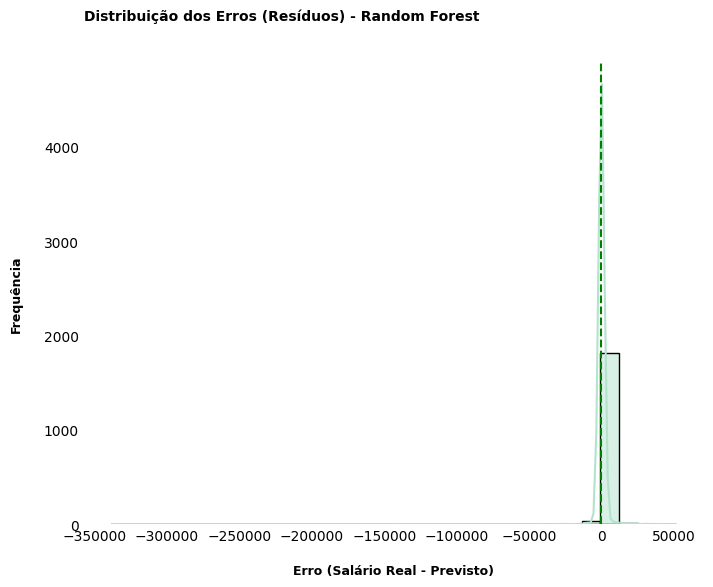

In [53]:
# Histograma dos resíduos (Random Forest)
residuos_rf = y_test - y_pred_rf

plt.figure(figsize=(8,6))
sns.histplot(residuos_rf, bins=30, kde=True)
plt.axvline(0, color='green', linestyle='--')
plt.xlabel('Erro (Salário Real - Previsto)',labelpad=15, fontsize=9, fontweight='semibold')
plt.ylabel('Frequência',labelpad=15, fontsize=9, fontweight='semibold')
plt.title('Distribuição dos Erros (Resíduos) - Random Forest', loc='left', fontsize=10, fontweight='bold', pad=30)
plt.box(False)
plt.tick_params(axis='both', length=0)
plt.show()

**Histograma dos resíduos (Random Forest)**

O que mostra:

    Os resíduos são a diferença entre os salários reais e os previstos.

    O histograma mostra como esses erros estão distribuídos.

    A linha preta tracejada em zero representa o ponto onde não há erro.

Interpretação:

    Um bom modelo apresenta distribuição simétrica e centrada em zero.

    Se a maior parte dos resíduos estiver próxima de zero, significa que o modelo não está cometendo erros sistemáticos (tendência de sempre superestimar ou subestimar salários).

    Se houvesse caudas muito longas ou assimetria forte, indicaria problemas em prever extremos.

    Aqui, a maior parte dos resíduos está concentrada perto de zero → modelo está estável e bem ajustado.

**Comparação dos Modelos**

**Regressão Linear**

    R² = 0.9757 → O modelo explica cerca de 97,6% da variabilidade dos salários.

    RMSE = 10.030,77 → O erro médio das previsões gira em torno de 10 mil dólares.

    Modelo simples, rápido, mas assume uma relação linear entre as variáveis.

**Random Forest**

    R² = 0.9808 → Explica 98,1% da variabilidade dos salários, ou seja, melhor que a regressão linear.

    RMSE = 8.913,12 → O erro médio caiu para cerca de 8,9 mil dólares, uma melhoria de ~11% na precisão em relação à regressão linear.

    Modelo mais robusto, não-linear, captura melhor as interações entre variáveis e outliers.

**Conclusão da comparação**

O Random Forest se saiu melhor:

    Maior poder explicativo (R² mais alto).

    Erro de previsão menor (RMSE mais baixo).

Porém:

É mais complexo e pesado computacionalmente.